# 1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [33]:
data=pd.read_csv("SalaryData_Train.csv")
data1=pd.read_csv("SalaryData_Test.csv")

In [34]:
data.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
data1.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [36]:
data['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [37]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print()
    

age
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

educationno
9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64

marit

In [38]:
#Removing unwanted features using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['education']=encoder.fit_transform(data['education'])
data['native']=encoder.fit_transform(data['native'])
data['maritalstatus']=encoder.fit_transform(data['maritalstatus'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['education'])
data['race']=encoder.fit_transform(data['race'])
data['sex']=encoder.fit_transform(data['education'])
data['Salary']=encoder.fit_transform(data['Salary'])


data1['workclass']=encoder.fit_transform(data1['workclass'])
data1['education']=encoder.fit_transform(data1['education'])
data1['native']=encoder.fit_transform(data1['native'])
data1['maritalstatus']=encoder.fit_transform(data1['maritalstatus'])
data1['occupation']=encoder.fit_transform(data1['occupation'])
data1['relationship']=encoder.fit_transform(data1['education'])
data1['race']=encoder.fit_transform(data1['race'])
data1['sex']=encoder.fit_transform(data1['education'])
data1['Salary']=encoder.fit_transform(data1['Salary'])


x=data.iloc[:,:-1]
y=data['Salary']
x1=data1.iloc[:,:-1]
y1=data1['Salary']

model=DecisionTreeClassifier()
model.fit(x,y)
model.feature_importances_
model1=DecisionTreeClassifier()
model1.fit(x1,y1)
print(model1.feature_importances_,"\n \n",model.feature_importances_)

[0.19471234 0.0484064  0.00840222 0.10979521 0.17661055 0.08885681
 0.00661152 0.01914884 0.00709592 0.16898699 0.04478058 0.10739132
 0.0192013 ] 
 
 [0.18310474 0.04845042 0.00768891 0.1262156  0.17342309 0.07964819
 0.00744292 0.01934742 0.00498592 0.18156949 0.04284837 0.10375329
 0.02152163]


In [39]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [40]:
#From the above we can see important features are : Age,Educationno,Maritalstatus,Capitalgain,hoursperweek,occupation
data=data.drop(columns=['workclass','education','relationship','race','sex','capitalloss','native'])
data1=data1.drop(columns=['workclass','education','relationship','race','sex','capitalloss','native'])

In [41]:
data

,age,educationno,maritalstatus,occupation,capitalgain,hoursperweek,Salary
0,39,13,4,0,2174,40,0
1,50,13,2,3,0,13,0
2,38,9,0,5,0,40,0
3,53,7,2,5,0,40,0
4,28,13,2,9,0,40,0
...,...,...,...,...,...,...,...
30156,27,12,2,12,0,38,0
30157,40,9,2,6,0,40,1
30158,58,9,6,0,0,40,0
30159,22,9,4,0,0,20,0


In [42]:
data1

,age,educationno,maritalstatus,occupation,capitalgain,hoursperweek,Salary
0,25,7,4,6,0,40,0
1,38,9,2,4,0,50,0
2,28,12,2,10,0,40,1
3,44,10,2,6,7688,40,1
4,34,6,4,7,0,30,0
...,...,...,...,...,...,...,...
15055,33,13,4,9,0,40,0
15056,39,13,0,9,0,36,0
15057,38,13,2,9,0,50,0
15058,44,13,0,0,5455,40,0


In [43]:
data.describe()

,age,educationno,maritalstatus,occupation,capitalgain,hoursperweek,Salary
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,2.580087,5.959849,1092.044064,40.931269,0.248931
std,13.134830,2.550037,1.498018,4.029633,7406.466611,11.980182,0.432401
min,17.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,2.000000,2.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,2.000000,6.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,4.000000,9.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,6.000000,13.000000,99999.000000,99.000000,1.000000


In [44]:
data1.describe()

,age,educationno,maritalstatus,occupation,capitalgain,hoursperweek,Salary
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,2.595286,5.989044,1120.301594,40.951594,0.245684
std,13.380676,2.558727,1.505336,4.020113,7703.181842,12.062831,0.430506
min,17.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,2.000000,2.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,2.000000,6.000000,0.000000,40.000000,0.000000
75%,48.000000,13.000000,4.000000,9.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,6.000000,13.000000,99999.000000,99.000000,1.000000


<AxesSubplot:>

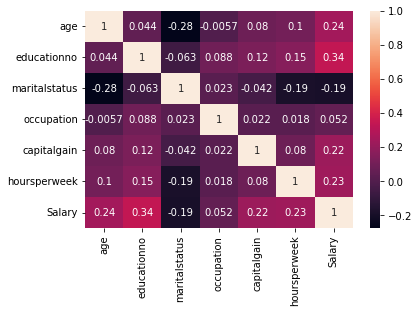

In [45]:
sn.heatmap(data.corr(),annot=True)

<AxesSubplot:>

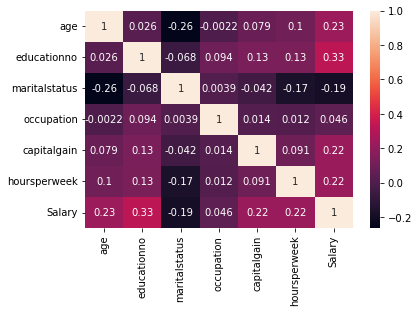

In [46]:
sn.heatmap(data1.corr(),annot=True)

<AxesSubplot:xlabel='Salary', ylabel='count'>

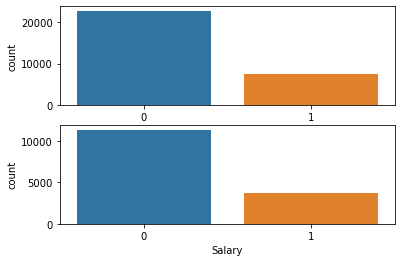

In [47]:
plt.subplot(2,1,1)
sn.countplot(data['Salary'],data=data)
plt.subplot(2,1,2)
sn.countplot(data1['Salary'],data=data1)

<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

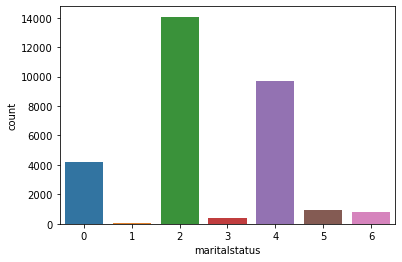

In [48]:
sn.countplot(data['maritalstatus'],data=data)

In [49]:
#Building Naive Bayes Model
x_train=data.iloc[:,:-1]
y_train=data['Salary']
x_test=data1.iloc[:,:-1]
y_test=data1['Salary']
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
gnb_model.fit(x_train,y_train)
y_pred=gnb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87     11360
           1       0.74      0.21      0.33      3700

    accuracy                           0.79     15060
   macro avg       0.76      0.59      0.60     15060
weighted avg       0.78      0.79      0.74     15060



<AxesSubplot:xlabel='Salary', ylabel='count'>

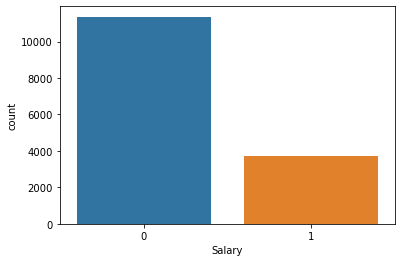

In [50]:
sn.countplot(y_test)

<AxesSubplot:ylabel='count'>

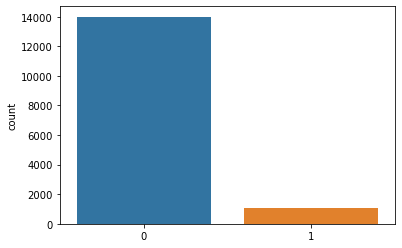

In [51]:
sn.countplot(y_pred)